In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [76]:
# Load the dataset
df = pd.read_csv('./datasets/cars.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [77]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [71]:
df = pd.get_dummies(df)
df

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,True,False,False,True,False
2,False,False,False,True,False,False,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1724,False,True,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
1725,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1726,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [78]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [79]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [80]:
# Splitting features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [81]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [83]:
# Initialize classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
naive_bayes = GaussianNB()

In [84]:
# Train classifiers
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [85]:
# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


K-Nearest Neighbors Evaluation:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Mean Squared Error (MSE): 0.28
Mean Absolute Error (MAE): 0.13
R2 Score: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       118
           1       1.00      0.42      0.59        19
           2       0.97      0.99      0.98       358
           3       0.84      0.67      0.74        24

    accuracy                           0.93       519
   macro avg       0.91      0.74      0.80       519
weighted avg       0.93      0.93      0.93       519

Confusion Matrix:
[[106   0   9   3]
 [ 11   8   0   0]
 [  4   0 354   0]
 [  6   0   2  16]]


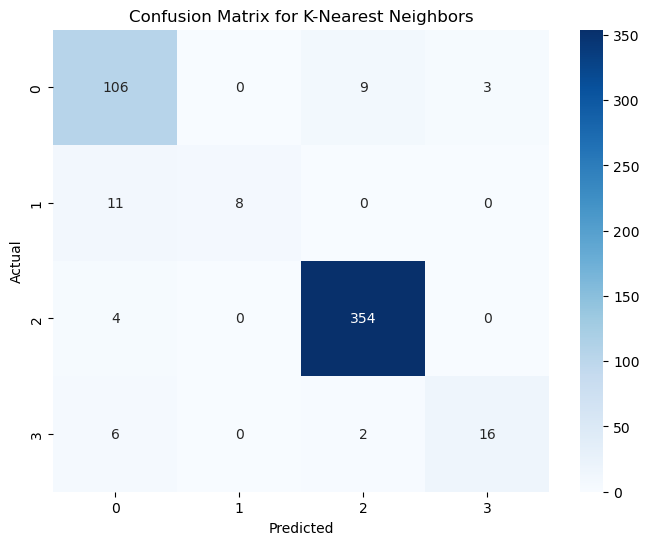


Logistic Regression Evaluation:
Accuracy: 0.66
Precision: 0.58
Recall: 0.66
F1 Score: 0.61
Mean Squared Error (MSE): 1.34
Mean Absolute Error (MAE): 0.65
R2 Score: -0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.17      0.21       118
           1       0.00      0.00      0.00        19
           2       0.73      0.90      0.81       358
           3       0.12      0.04      0.06        24

    accuracy                           0.66       519
   macro avg       0.29      0.28      0.27       519
weighted avg       0.58      0.66      0.61       519

Confusion Matrix:
[[ 20   0  92   6]
 [  3   0  16   0]
 [ 34   0 323   1]
 [ 12   0  11   1]]


C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-pa

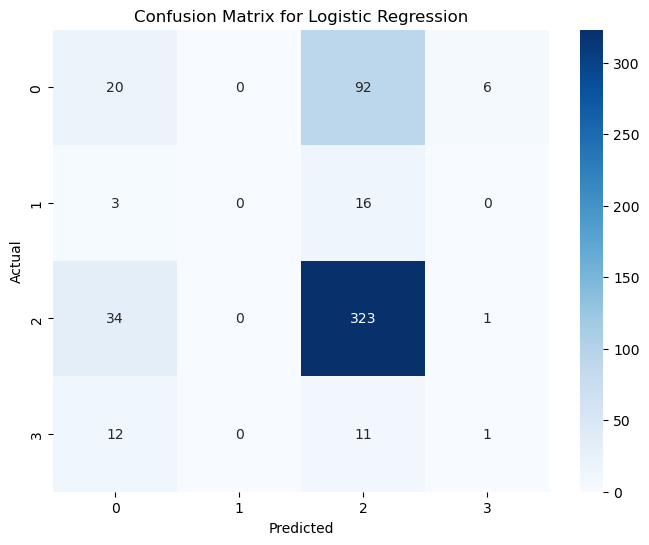


Naive Bayes Evaluation:
Accuracy: 0.64
Precision: 0.70
Recall: 0.64
F1 Score: 0.63
Mean Squared Error (MSE): 1.61
Mean Absolute Error (MAE): 0.70
R2 Score: -1.02
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.09      0.16       118
           1       0.00      0.00      0.00        19
           2       0.84      0.84      0.84       358
           3       0.17      1.00      0.29        24

    accuracy                           0.64       519
   macro avg       0.37      0.48      0.32       519
weighted avg       0.70      0.64      0.63       519

Confusion Matrix:
[[ 11   0  51  56]
 [  5   0   5   9]
 [  7   0 299  52]
 [  0   0   0  24]]


C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-pa

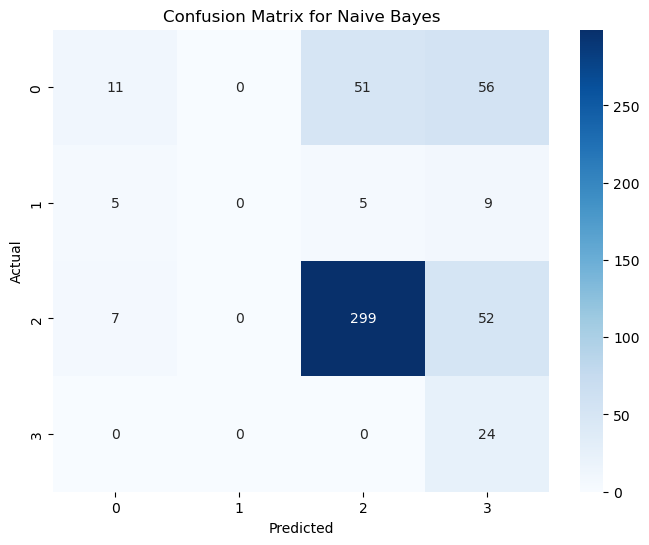

In [86]:
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(naive_bayes, X_test, y_test, "Naive Bayes")

In [87]:
# Ensemble classifier using Stacking
estimators = [
    ('knn', knn),
    ('log_reg', log_reg),
    ('naive_bayes', naive_bayes)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=3)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression())


Stacking Ensemble Evaluation:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.93
Mean Squared Error (MSE): 0.29
Mean Absolute Error (MAE): 0.12
R2 Score: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       118
           1       1.00      0.42      0.59        19
           2       0.98      0.99      0.98       358
           3       0.78      0.75      0.77        24

    accuracy                           0.94       519
   macro avg       0.90      0.77      0.80       519
weighted avg       0.94      0.94      0.93       519

Confusion Matrix:
[[107   0   7   4]
 [ 10   8   0   1]
 [  4   0 354   0]
 [  6   0   0  18]]


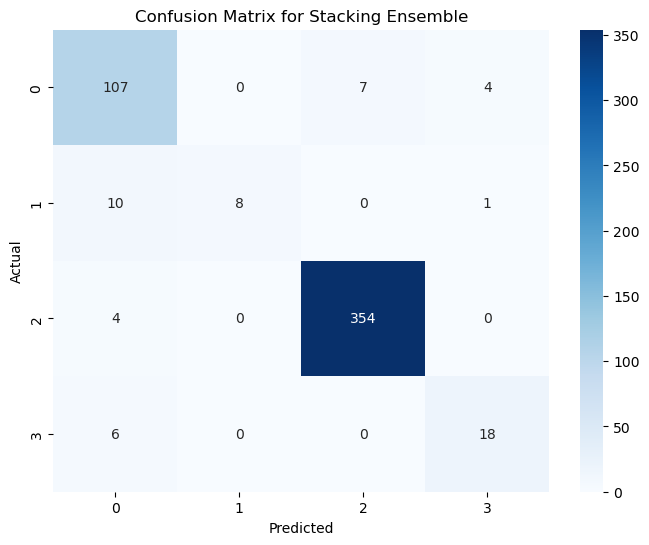

In [88]:
# Evaluate the stacking ensemble
evaluate_model(stacking_clf, X_test, y_test, "Stacking Ensemble")

In [89]:
# Hyperparameter tuning for ensemble method
param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(stacking_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=StackingClassifier(cv=3,
                                          estimators=[('knn',
                                                       KNeighborsClassifier()),
                                                      ('log_reg',
                                                       LogisticRegression(max_iter=1000,
                                                                          random_state=42)),
                                                      ('naive_bayes',
                                                       GaussianNB())],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.1, 1, 10],
                         'final_estimator__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [90]:
print("\nBest parameters for Stacking Ensemble:", grid_search.best_params_)
print(f"Best accuracy from Grid Search: {grid_search.best_score_:.2f}")


Best parameters for Stacking Ensemble: {'final_estimator__C': 10, 'final_estimator__solver': 'lbfgs'}
Best accuracy from Grid Search: 0.91


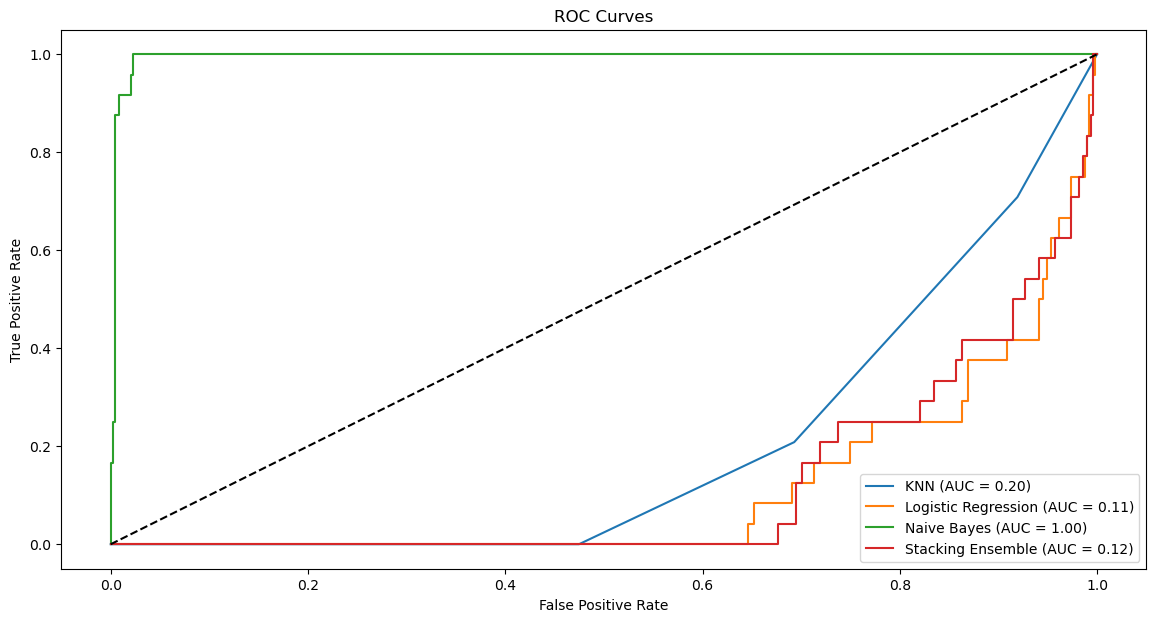

In [91]:
# Plotting ROC curve for each model
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

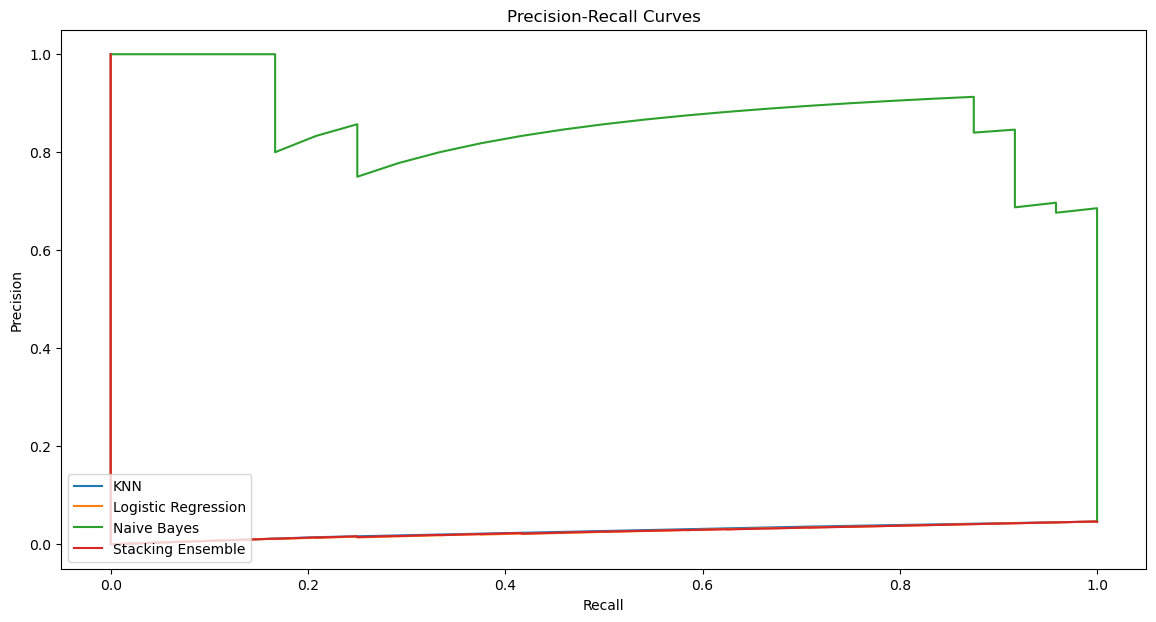

In [92]:
# Precision-Recall Curves
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=y_test.max())
        plt.plot(recall, precision, label=f'{name}')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


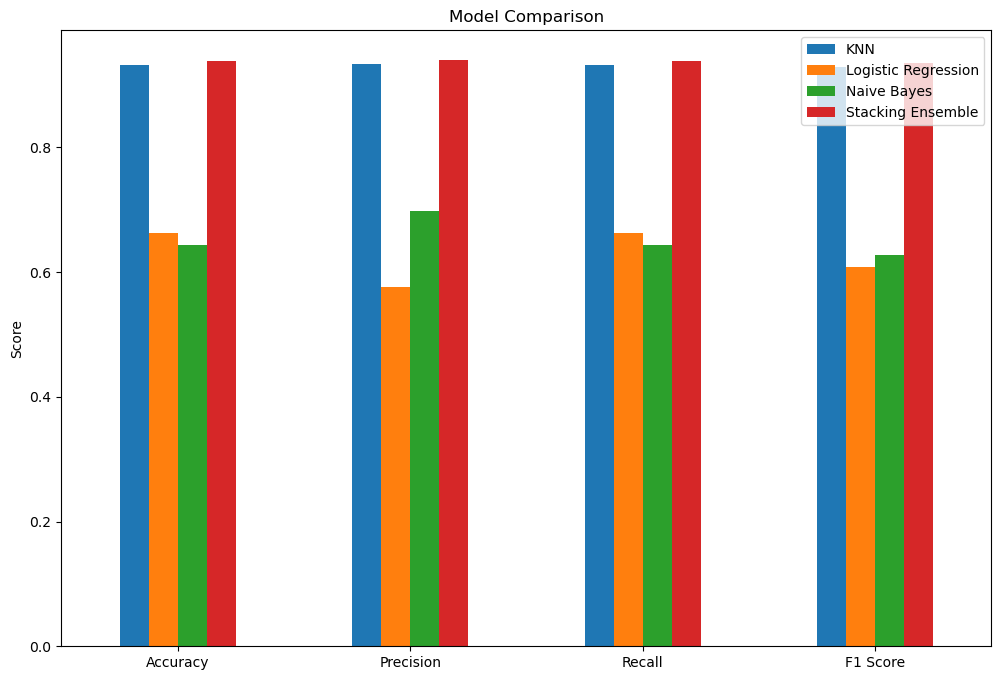

In [93]:
# Bar chart for model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {
    'KNN': [accuracy_score(y_test, knn.predict(X_test)),
            precision_score(y_test, knn.predict(X_test), average='weighted'),
            recall_score(y_test, knn.predict(X_test), average='weighted'),
            f1_score(y_test, knn.predict(X_test), average='weighted')],
    'Logistic Regression': [accuracy_score(y_test, log_reg.predict(X_test)),
                            precision_score(y_test, log_reg.predict(X_test), average='weighted'),
                            recall_score(y_test, log_reg.predict(X_test), average='weighted'),
                            f1_score(y_test, log_reg.predict(X_test), average='weighted')],
    'Naive Bayes': [accuracy_score(y_test, naive_bayes.predict(X_test)),
                    precision_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    recall_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    f1_score(y_test, naive_bayes.predict(X_test), average='weighted')],
    'Stacking Ensemble': [accuracy_score(y_test, stacking_clf.predict(X_test)),
                          precision_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          recall_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          f1_score(y_test, stacking_clf.predict(X_test), average='weighted')]
}

df_results = pd.DataFrame(results, index=metrics)
df_results.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [94]:
df_results

,KNN,Logistic Regression,Naive Bayes,Stacking Ensemble
Accuracy,0.932563,0.662813,0.643545,0.938343
Precision,0.934315,0.575758,0.697585,0.940767
Recall,0.932563,0.662813,0.643545,0.938343
F1 Score,0.928321,0.608527,0.627459,0.934941
